Author: Dr. Göktuğ Aşcı <br>
Data: [Data set on Heart attack possibility](https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility)

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# importing data wrangling and data visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import seaborn as sns

# importing preprocessing libraries
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, Normalizer, normalize, MinMaxScaler, RobustScaler, StandardScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import r2_score, confusion_matrix
from sklearn import set_config

# importing machine learning components
from sklearn.decomposition import PCA
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Table of Contents:
1. Introduction
2. Exploratory Data Analysis
3. Data Engineering
4. Data Visualization
5. ML Predictive Analytics
6. Conclusion

# Introduction

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack.

### Column Descriptions
1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina
    * 1: Atypical angina
    * 2: Non-anginal pain
    * 3: Asymptomatic
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) 
5. `chol` - Serum cholesterole in mg/dl
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    * 2: Possible or definite left ventricular hypertrophy
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
# importing the dataset with correct index column and parsing the dates:
df = pd.read_csv("heart.csv") #parse dates
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print("Column data types:")
df.dtypes

Column data types:


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# counting nan values
count_nan = len(df) - df.count()
count_nan

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values.

In [7]:
col_list = list(df.columns)
remove_list = ['cp', 'sex'] # remove these values from the group by comparison

for el in remove_list: 
    col_list.remove(el) 

List differences between different angina types among different sexes:

In [8]:
angina_types = df.groupby(['cp','sex'])[col_list].mean().round(3)
angina_types

age  trestbps     chol    fbs  restecg  thalach  exang  oldpeak  \
cp sex                                                                       
0  0    57.256   138.590  267.538  0.128    0.538  145.282  0.462    1.356   
   1    55.106   129.558  243.606  0.125    0.452  138.760  0.596    1.393   
1  0    51.944   128.056  251.444  0.111    0.556  162.833  0.111    0.461   
   1    51.031   128.594  241.031  0.094    0.656  162.188  0.062    0.234   
2  0    54.971   127.886  261.057  0.114    0.600  151.800  0.057    0.474   
   1    52.538   132.058  231.135  0.250    0.596  158.173  0.173    1.015   
3  0    63.250   147.500  247.000  0.250    0.750  149.500  0.000    1.575   
   1    54.316   139.474  235.053  0.211    0.316  157.316  0.211    1.353   

        slope     ca   thal  target  
cp sex                               
0  0    1.179  0.821  2.282   0.462  
   1    1.288  1.019  2.510   0.202  
1  0    1.667  0.556  2.000   0.889  
   1    1.688  0.344  2.219   0.781  
2  0    1.571  0.257  2.029   0.971  
   1    1.462  0.808  2.327   0.673  
3  0    1.500  0.500  2.000   1.000  
   1    1.211  0.474  2.316   0.632

# Visualization

In [9]:
#For better theming sns.set was applied:
sns.set()

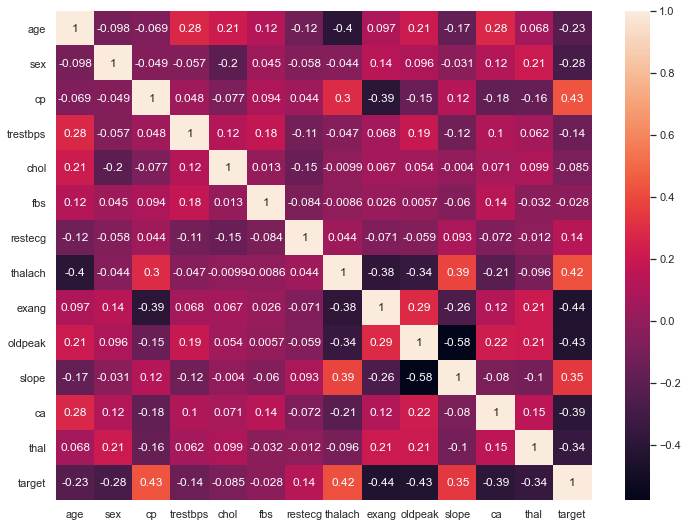

In [10]:
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), annot=True);

Text(29.612470442708336, 0.5, 'target')

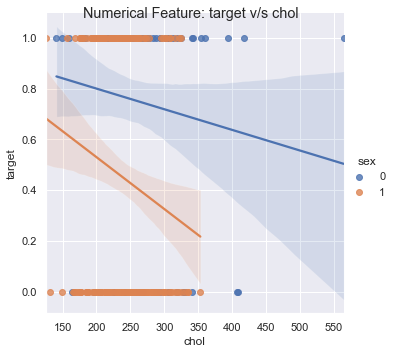

In [11]:
sns.lmplot(x="chol", y="target", data=df, hue="sex")
plt.suptitle('Numerical Feature: target v/s chol')
plt.xlabel('chol')
plt.ylabel('target')

## TO DO
* make the graph above interactive

# Machine Learning and Feature Engineering

In [12]:
# defining a constant seed to be able to replicate same conditions:
seed=120

In [13]:
# defining target & feature columns:
X = df.drop(columns=['target'])
y = df[['target']]

* Less than 100mg/dL	- Optimal <br>
* 100-129mg/dL	- Near optimal/above optimal <br>
* 130-159 mg/dL	- Borderline high <br>
* 160-189 mg/dL	- High <br>
* 190 mg/dL and above	- Very High <br>

Besides, the risk of getting CHD depends on sex and age:

In [14]:
preprocessing = ColumnTransformer([
    
    ("age_fill", Pipeline([
        ("age_risk", FunctionTransformer(lambda x: 1 if (x > 50) else 0)),
    ]), ["age"]),
    
    ("chol_fill", Pipeline([
        ("high_cholesterol", FunctionTransformer(lambda x: 1 if x > 160 else 0)),
    ]), ["chol"]),
    
], remainder="passthrough")

In [15]:
# creating the pipeline
clf = Pipeline([
    ("preprocessing", preprocessing),
    #("pca", PCA()), # PCA before applying the linear regression
    ("regression", None) # start with linear regression but go deeper with other algorithms
])

In [16]:
# Displaying how the pre processing is constructed, stolen from Juan Carlos
set_config(display="diagram")
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('age_fill',
                                 Pipeline(steps=[('age_risk',
                                                  FunctionTransformer(func=<function <lambda> at 0x7fad05ec9160>))]),
                                 ['age']),
                                ('chol_fill',
                                 Pipeline(steps=[('high_cholesterol',
                                                  FunctionTransformer(func=<function <lambda> at 0x7fad05ec9280>))]),
                                 ['chol'])])

In [17]:
# creating the list of algorithms and hyperparameters to try:
# we reduced the number of test hyperparameters to reduce execution time of the notebook: "tried" hyperparameters
param_grid = [
    #{
    #    "regression": [LinearRegression()],
    #    "regression__normalize": [False], # True tried
    #},
    {
        "regression": [DecisionTreeClassifier()], 
        "regression__max_depth": [10], # 5 tried
        "regression__random_state": [seed],
    },
    {
        "regression": [RandomForestClassifier()],
        "regression__random_state": [seed],
        "regression__max_depth": [10],  # 5 tried
        "regression__n_estimators": [30],  # 50 tried
        "regression__max_features": [0.7]  # 0.8 tried
    }
]

In [18]:
clf = GridSearchCV(clf, param_grid, n_jobs=-1, cv=10, scoring="r2")

In [19]:
clf.fit(X, y)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# listing the best parameters for the param_grid:
clf.best_params_

In [ ]:
# get the best score
clf.best_score_

In [ ]:
# list all the scores of different models
test_scores = clf.cv_results_['mean_test_score']
test_scores

# Conclusions